Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).

1 - Precipitações por trimestre (2011-2020):

Ano	Trimestre	Precipitação
 Ano  Trimestre  CHUVA
2011          0  227.4
2011          1  213.0
2011          2   66.6
2011          3  168.0
2012          0  199.4
2012          1  149.4
2012          2  166.0
2012          3  417.2
2013          0  297.0
2013          1  176.4
2013          2  244.0
2013          3  271.2
2014          0  257.4
2014          1  322.2
2014          2  250.2
2014          3  292.8
2015          0  225.8
2015          1  243.4
2015          2  295.6
2015          3  460.4
2016          0  261.2
2016          1  162.6
2016          2  170.4
2016          3  451.4
2017          0  354.0
2017          1  309.4
2017          2  266.4
2017          3  232.6
2018          0  204.4
2018          1  110.8
2018          2  276.2
2018          3  275.0
2019          0  233.0
2019         

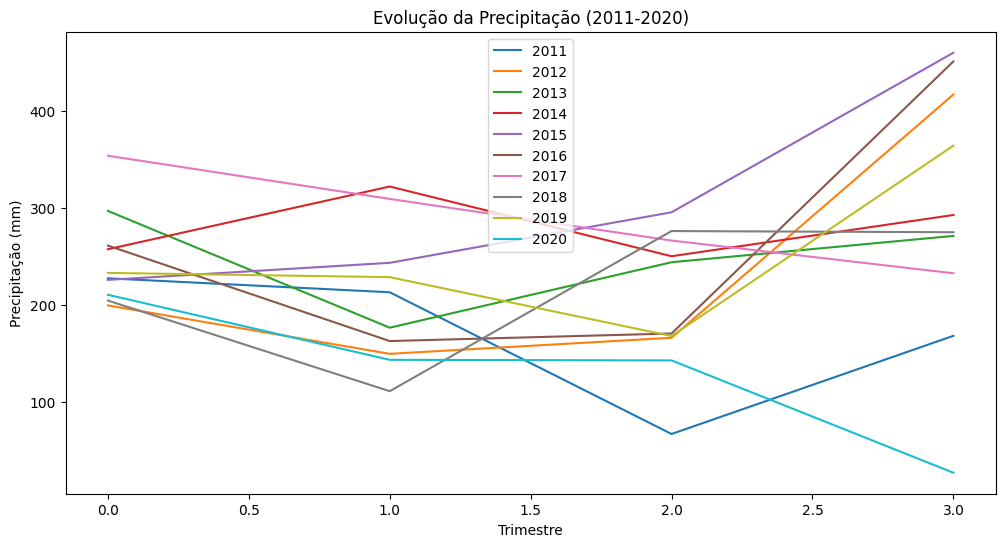

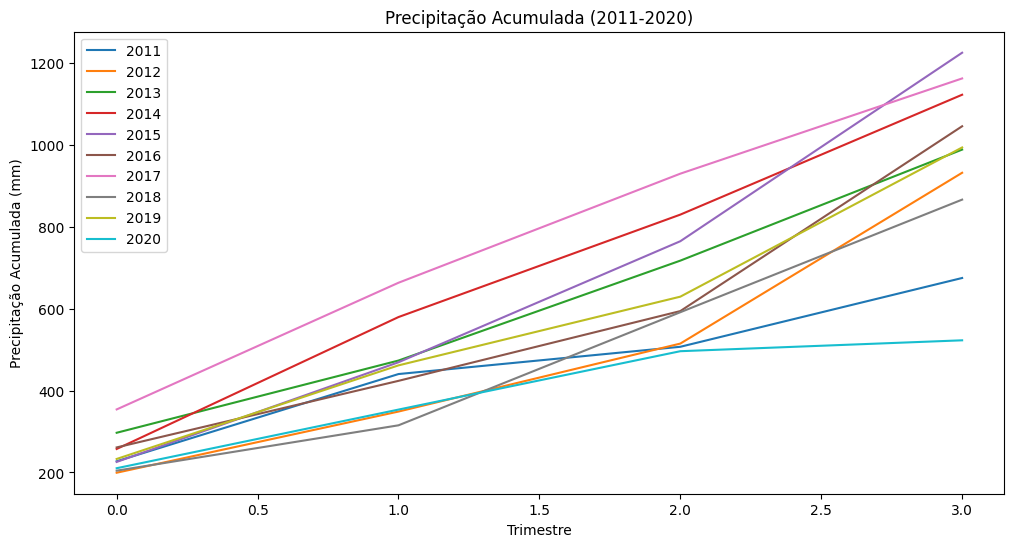

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')
caminho='/content/gdrive/MyDrive/'
dataset='ds_chuva_sm_2011_2020_10.csv'
caminho_dataset=caminho+dataset

anos = range(2011, 2021)
trimestres = range(1, 5)

dados = pd.read_csv(caminho_dataset, sep=';', decimal=',')
dados['DT_MEDICAO'] = pd.to_datetime(dados['DT_MEDICAO'], format='%Y-%m-%d')

#-------------------------------------------------------------------------------------------------------- Parte 1:
anos = range(2011, 2021)
trimestres = range(1, 5)
combinacoes = [(ano, trimestre) for ano in anos for trimestre in trimestres]
combinacoes_df = pd.DataFrame(combinacoes, columns=['Ano', 'Trimestre'])

dados['Ano'] = dados['DT_MEDICAO'].dt.year
dados['Trimestre'] = (dados['DT_MEDICAO'].dt.month - 1) // 3
precipitacao_trimestre = dados.groupby(['Ano', 'Trimestre'])['CHUVA'].sum().reset_index()

print("\n1 - Precipitações por trimestre (2011-2020):\n")
print("Ano", "Trimestre", "Precipitação", sep="\t")
print(precipitacao_trimestre.to_string(index=False))

#--------------------------------------------------------------------------------------------------------- Parte 3:
combinacoes_df = pd.DataFrame(combinacoes, columns=['Ano', 'Trimestre'])
dados_ausentes = pd.merge(combinacoes_df, precipitacao_trimestre, on=['Ano', 'Trimestre'], how='left')
trimestres_ausentes = dados_ausentes[dados_ausentes['CHUVA'].isna()]

print("\n3 - Trimestres com dados ausentes:\n")
print(trimestres_ausentes.to_string(index=False))


#--------------------------------------------------------------------------------------------------------- Parte 2:
print("\n2 - Graficos:\n")

precipitacao_trimestre = dados.groupby(['Ano', 'Trimestre'])['CHUVA'].sum().reset_index() #precipitação total para cada trimestre
precipitacao_acumulada = precipitacao_trimestre.groupby('Ano')['CHUVA'].cumsum()
precipitacao_trimestre['Precipitação Acumulada'] = precipitacao_acumulada

#------------------------------- Plot a evolução da precipitação
plt.figure(figsize=(12, 6))  #Ajuste o tamanho do grafico aqui
for ano in range(2011, 2021):
    dados_ano = precipitacao_trimestre[precipitacao_trimestre['Ano'] == ano]
    plt.plot(dados_ano['Trimestre'], dados_ano['CHUVA'], label=str(ano))

plt.xlabel('Trimestre')
plt.ylabel('Precipitação (mm)')
plt.title('Evolução da Precipitação (2011-2020)')
plt.legend()

#----------------------------- Plot a precipitação acumulada
plt.figure(figsize=(12, 6))  #Ajuste o tamanho do grafico aqui
for ano in range(2011, 2021):
    dados_ano = precipitacao_trimestre[precipitacao_trimestre['Ano'] == ano]
    plt.plot(dados_ano['Trimestre'], dados_ano['Precipitação Acumulada'], label=str(ano))

plt.xlabel('Trimestre')
plt.ylabel('Precipitação Acumulada (mm)')
plt.title('Precipitação Acumulada (2011-2020)')
plt.legend()


plt.show() #exibir os graficos



